In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Employee.csv")
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [5]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


Data Cleaning

In [6]:
#Removing Null values:
df.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [12]:
df['Age'].replace(np.NaN,0,inplace=True)
df["Place"].fillna(df["Place"].mode()[0], inplace=True)
df["Company"].fillna(df["Company"].mode()[0], inplace=True)
df['Salary'].fillna(df['Salary'].mean(), inplace=True)

In [14]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5312.467742,Chennai,India,0
1,Infosys,30.0,5312.467742,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0


In [13]:
df.isnull().sum()

Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64

In [15]:
#Removing Duplicates:
df.duplicated().sum()

4

In [16]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [18]:
#Handling Outliers:
q1 = df[['Age', 'Salary']].quantile(0.25)
q3 = df[['Age', 'Salary']].quantile(0.75)
iqr = q3-q1
print('q1:',q1)
print('q3:',q3)
print('iqr:',iqr)

q1: Age         21.75
Salary    3045.00
Name: 0.25, dtype: float64
q3: Age         36.0
Salary    7084.0
Name: 0.75, dtype: float64
iqr: Age         14.25
Salary    4039.00
dtype: float64


In [19]:
upper_limit = q3+(1.5*iqr)
lower_limit = q1-(1.5*iqr)
print('upper limit: ',upper_limit)
print('lower limit: ',lower_limit)

upper limit:  Age          57.375
Salary    13142.500
dtype: float64
lower limit:  Age          0.375
Salary   -3013.500
dtype: float64


In [22]:
outliers = ((df[['Age', 'Salary']]<lower_limit | (df[['Age', 'Salary']]>upper_limit)).any(axis=1))
print(df[outliers])

     Company  Age       Salary       Place Country  Gender  Age_Zscore  \
5    Infosys  0.0  5000.000000    Calcutta   India       0   -1.879848   
6        TCS  0.0  6000.000000     Chennai   India       1   -1.879848   
23   Infosys  0.0  5835.000000      Cochin   India       0   -1.879848   
24       TCS  0.0  7084.000000     Chennai   India       1   -1.879848   
41   Infosys  0.0  5000.000000      Mumbai   India       0   -1.879848   
42       TCS  0.0  6000.000000      Mumbai   India       0   -1.879848   
59   Infosys  0.0  5835.000000      Mumbai   India       0   -1.879848   
60       TCS  0.0  7084.000000    Calcutta   India       0   -1.879848   
77   Infosys  0.0  5000.000000   Hyderabad   India       0   -1.879848   
78       TCS  0.0  6000.000000    Calcutta   India       0   -1.879848   
88   Infosys  0.0  3030.000000    Calcutta   India       0   -1.879848   
92       TCS  0.0  3045.000000       Delhi   India       0   -1.879848   
95   Infosys  0.0  5835.000000     Che

Data Analysis

In [23]:
filtered_data = df[(df['Age'] > 40) & (df['Salary'] < 5000)]
filtered_data

,Company,Age,Salary,Place,Country,Gender,Age_Zscore,Salary_Zscore
21,Infosys,50.0,3184.0,Delhi,India,0,1.611229,-0.891517
32,Infosys,45.0,4034.0,Calcutta,India,0,1.262122,-0.531369
39,Infosys,41.0,3000.0,Mumbai,India,0,0.982835,-0.969479
50,Infosys,41.0,3000.0,Chennai,India,0,0.982835,-0.969479
57,Infosys,51.0,3184.0,Hyderabad,India,0,1.681051,-0.891517
68,Infosys,43.0,4034.0,Mumbai,India,0,1.122479,-0.531369
75,Infosys,44.0,3000.0,Cochin,India,0,1.192300,-0.969479
86,Infosys,41.0,3000.0,Delhi,India,0,0.982835,-0.969479
93,Infosys,54.0,3184.0,Mumbai,India,0,1.890516,-0.891517
104,Infosys,44.0,4034.0,Delhi,India,0,1.192300,-0.531369


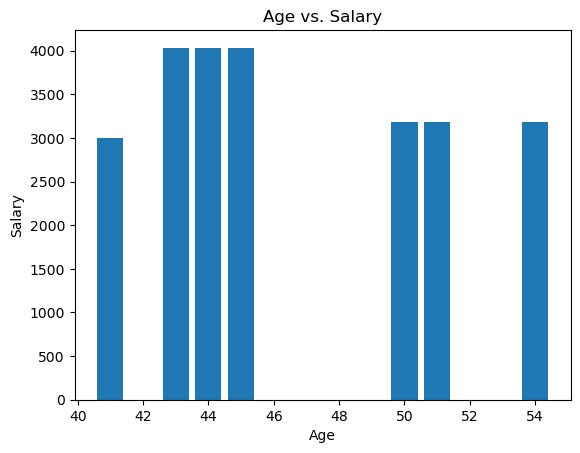

In [24]:
import matplotlib.pyplot as plt
plt.bar(filtered_data['Age'], filtered_data['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs. Salary')
plt.show()

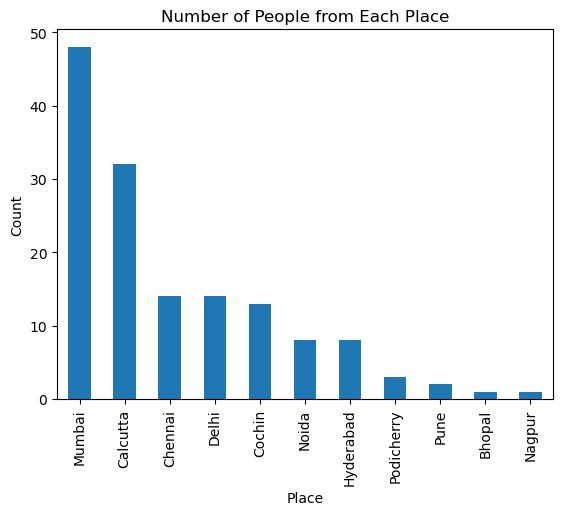

In [26]:
# Count people from each place and visualize
place_counts = df['Place'].value_counts()
place_counts.plot(kind='bar', title='Number of People from Each Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.show()

Data Encoding

In [27]:
# One-hot encoding for categorical variables
import numpy as np
data_encoded = pd.get_dummies(df, columns=["Company", "Place", "Country"])
data_encoded

,Age,Salary,Gender,Age_Zscore,Salary_Zscore,Company_CTS,Company_Congnizant,Company_Infosys,Company_Infosys Pvt Lmt,Company_TCS,...,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune,Country_India
0,20.0,5312.467742,0,-0.483417,0.010324,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,True
1,30.0,5312.467742,0,0.214798,0.010324,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,35.0,2300.000000,0,0.563906,-1.266072,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
3,40.0,3000.000000,0,0.913014,-0.969479,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
4,23.0,4000.000000,0,-0.273953,-0.545775,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,22.0,8202.000000,0,-0.343774,1.234631,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
143,33.0,9024.000000,1,0.424263,1.582916,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
145,44.0,4034.000000,1,1.192300,-0.531369,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
146,33.0,5034.000000,1,0.424263,-0.107664,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True


In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
x=LabelEncoder()
df["Company"] = x.fit_transform(df["Company"])
df["Place"] =x.fit_transform(df["Place"])
df["Country"] =x.fit_transform(df["Country"])
df

,Company,Age,Salary,Place,Country,Gender,Age_Zscore,Salary_Zscore
0,4,20.0,5312.467742,2,0,0,-0.483417,0.010324
1,2,30.0,5312.467742,6,0,0,0.214798,0.010324
2,4,35.0,2300.000000,1,0,0,0.563906,-1.266072
3,2,40.0,3000.000000,4,0,0,0.913014,-0.969479
4,4,23.0,4000.000000,6,0,0,-0.273953,-0.545775
...,...,...,...,...,...,...,...,...
142,3,22.0,8202.000000,6,0,0,-0.343774,1.234631
143,4,33.0,9024.000000,1,0,1,0.424263,1.582916
145,2,44.0,4034.000000,4,0,1,1.192300,-0.531369
146,4,33.0,5034.000000,6,0,1,0.424263,-0.107664


Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Columns to scale
columns_to_scale = [ 'Age', 'Salary']

# Instantiate StandardScaler and MinMaxScaler
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Scale each column
data_scaled_standard = df.copy()  # Make a copy to keep original data
data_scaled_minmax = df.copy()  # Make a copy to keep original data

# StandardScaler
data_scaled_standard[columns_to_scale] = scaler_standard.fit_transform(data_scaled_standard[columns_to_scale])

# MinMaxScaler
data_scaled_minmax[columns_to_scale] = scaler_minmax.fit_transform(data_scaled_minmax[columns_to_scale])

# Check the scaled data
print("Scaled Data using StandardScaler:")
print(data_scaled_standard.head())

print("\nScaled Data using MinMaxScaler:")
print(data_scaled_minmax.head())

Scaled Data using StandardScaler:
   Company       Age    Salary  Place  Country  Gender  Age_Zscore  \
0        4 -0.483417  0.010324      2        0       0   -0.483417   
1        2  0.214798  0.010324      6        0       0    0.214798   
2        4  0.563906 -1.266072      1        0       0    0.563906   
3        2  0.913014 -0.969479      4        0       0    0.913014   
4        4 -0.273953 -0.545775      6        0       0   -0.273953   

   Salary_Zscore  
0       0.010324  
1       0.010324  
2      -1.266072  
3      -0.969479  
4      -0.545775  

Scaled Data using MinMaxScaler:
   Company       Age    Salary  Place  Country  Gender  Age_Zscore  \
0        4  0.370370  0.480650      2        0       0   -0.483417   
1        2  0.555556  0.480650      6        0       0    0.214798   
2        4  0.648148  0.137817      1        0       0    0.563906   
3        2  0.740741  0.217480      4        0       0    0.913014   
4        4  0.425926  0.331285      6        0  